# Exploratory of DMSO 24hr expt3 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716390?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
barcodes = pd.read_csv('../data/DMSO_24hr_expt3/barcodes.tsv', sep='\t', index_col=None, header=None)

In [3]:
barcodes

,0
0,AAACCTGAGAGCAATT-1
1,AAACCTGAGATCTGAA-1
2,AAACCTGCACACTGCG-1
3,AAACCTGCACCAGATT-1
4,AAACCTGCAGCTCGAC-1
...,...
6882,TTTGTCAGTGCAACGA-1
6883,TTTGTCAGTTCAACCA-1
6884,TTTGTCATCATTGCCC-1
6885,TTTGTCATCGCAGGCT-1


In [4]:
classification = pd.read_csv('../data/DMSO_24hr_expt3/classifications.csv', sep=',', index_col=0, header=0)

In [5]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAGCAATT-1,UACC257_SKIN,1508,0.712618,15.495622,0.506611,13.548359,0.072938,3208,0.006780,UACC257_SKIN,NUGC3_STOMACH,4.414052,0.183071,normal,3.991730e-07,ACH-000579
AAACCTGAGATCTGAA-1,HEC1B_ENDOMETRIUM,1949,0.678595,9.745427,0.420509,7.417785,0.060467,4862,0.005620,HEC1B_ENDOMETRIUM,RCC10RGB_KIDNEY,7.822240,0.210704,normal,4.545183e-08,ACH-000941
AAACCTGCACACTGCG-1,LOVO_LARGE_INTESTINE,1145,0.195406,2.740381,0.015594,0.421547,0.116991,2550,0.060087,LOVO_LARGE_INTESTINE,HS766T_PANCREAS,3.687957,0.167387,empty_droplet,NaN,ACH-000950
AAACCTGCACCAGATT-1,COLO680N_OESOPHAGUS,1721,0.717149,21.908137,0.511051,17.376046,1.797817,4325,0.004348,COLO680N_OESOPHAGUS,A2780_OVARY,3.072946,0.196673,normal,5.658369e-09,ACH-000717
AAACCTGCAGCTCGAC-1,KYSE270_OESOPHAGUS,1966,0.851971,14.055579,0.617102,11.794789,0.073605,4925,0.001130,KYSE270_OESOPHAGUS,CJM_SKIN,2.719318,0.222283,normal,1.816224e-12,ACH-000873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,BEN_LUNG,1532,0.710869,19.950012,0.539045,17.946639,0.048418,3011,0.003898,BEN_LUNG,SNB75_CENTRAL_NERVOUS_SYSTEM,9.051626,0.186656,normal,1.766823e-09,ACH-000603
TTTGTCAGTTCAACCA-1,RH30_SOFT_TISSUE,1283,0.582567,17.758199,0.406947,15.297136,0.516891,2322,0.005812,RH30_SOFT_TISSUE,NCIH1915_LUNG,5.893880,0.162791,normal,2.681536e-08,ACH-000833
TTTGTCATCATTGCCC-1,IGROV1_OVARY,1838,0.709499,19.973866,0.525046,17.632798,0.362275,4063,0.004796,IGROV1_OVARY,ISTMES1_PLEURA,7.727994,0.221089,normal,1.328966e-08,ACH-000966


In [6]:
genes = pd.read_csv('../data/DMSO_24hr_expt3/genes.tsv', sep='\t', header=None, index_col=0)

In [7]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [8]:
mtx = pd.read_csv('../data/DMSO_24hr_expt3/matrix.mtx', sep=' ', header=1, index_col=None)

In [9]:
mtx

,32738,6887,41244737
0,9,1,2
1,36,1,2
2,41,1,1
3,43,1,1
4,44,1,3
...,...,...,...
41244732,32706,6887,321
41244733,32707,6887,39
41244734,32708,6887,4
41244735,32709,6887,296


In [10]:
import  scanpy as sc

In [11]:
adata = sc.read_10x_mtx('../data/DMSO_24hr_expt3/')

In [12]:
adata

AnnData object with n_obs × n_vars = 6887 × 32738
    var: 'gene_ids'

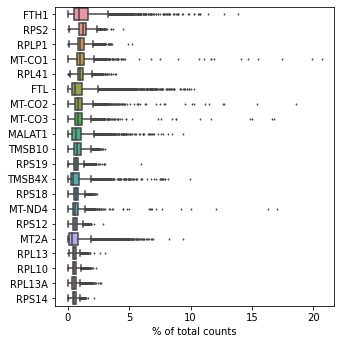

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [14]:
adata.strings_to_categoricals() 

In [15]:
adata.to_df() 


,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGAGCAATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGATCTGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACACTGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCAGATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCTCGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTCAACCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCATTGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCGCAGGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


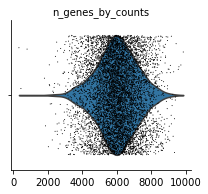

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', ],
             jitter=0.4, multi_panel=True, )

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


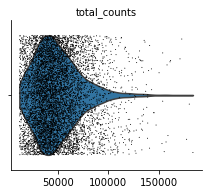

In [18]:
sc.pl.violin(adata, ['total_counts'],
             jitter=0.4, multi_panel=True, )

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


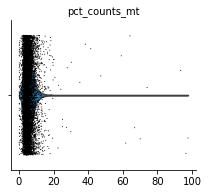

In [19]:
sc.pl.violin(adata, ['pct_counts_mt'],
             jitter=0.4, multi_panel=True, )

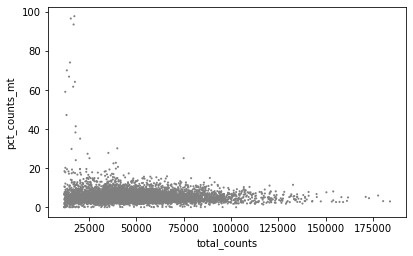

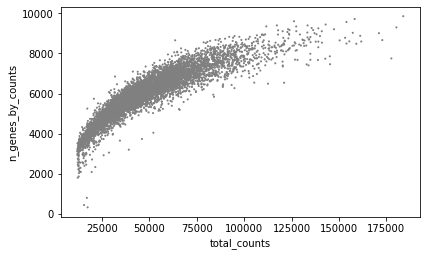

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [21]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :] 
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [22]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

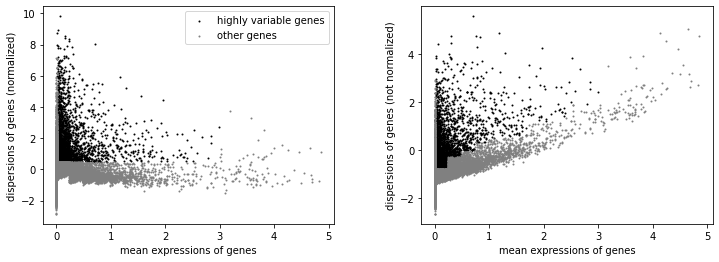

In [25]:
sc.pl.highly_variable_genes(adata)

In [26]:
adata.raw = adata

In [27]:
adata = adata[:, adata.var.highly_variable] 

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [30]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [31]:
sc.pp.scale(adata, max_value=10) 

## PCA

Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [32]:
sc.tl.pca(adata, svd_solver='arpack')

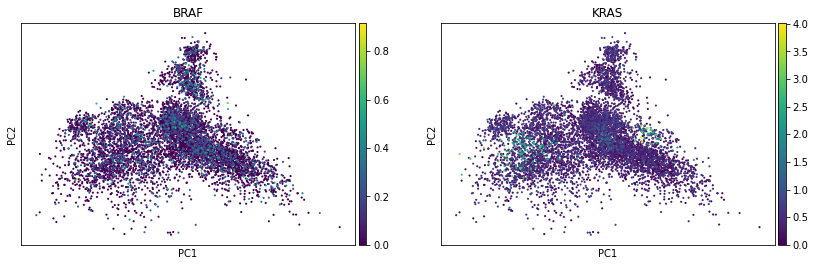

In [33]:
sc.pl.pca(adata, color= ['BRAF', 'KRAS'] )

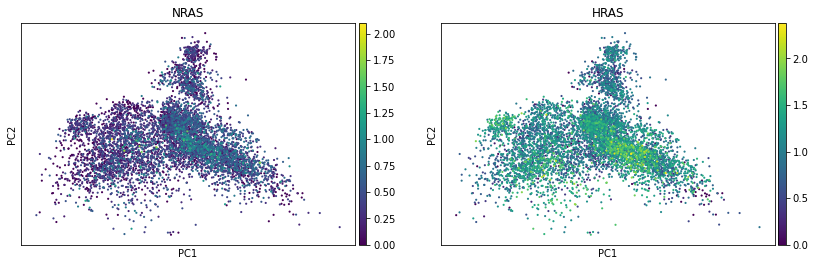

In [35]:
sc.pl.pca(adata, color= ['NRAS', 'HRAS'] )

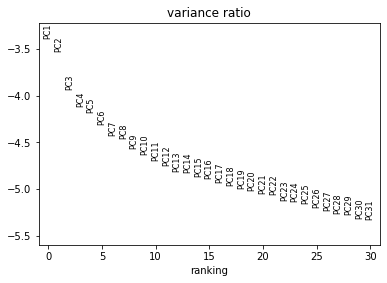

In [36]:
sc.pl.pca_variance_ratio(adata, log=True) 

In [37]:
print(sorted(list(adata.var_names)))

['7SK-2', 'A2M', 'AARD', 'ABCA1', 'ABCA7', 'ABCB1', 'ABCC2', 'ABCC3', 'ABCG2', 'ABHD12B', 'ABHD2', 'ABLIM1', 'AC002076.10', 'AC002454.1', 'AC002456.2', 'AC003092.1', 'AC004540.4', 'AC006262.4', 'AC006262.5', 'AC006277.2', 'AC007405.6', 'AC009005.2', 'AC009336.24', 'AC009403.2', 'AC009410.1', 'AC009501.4', 'AC009502.4', 'AC018799.1', 'AC018890.6', 'AC020571.3', 'AC023490.1', 'AC060834.3', 'AC064834.1', 'AC073218.2', 'AC073236.3', 'AC074389.9', 'AC093323.3', 'AC098973.2', 'AC104135.3', 'AC104654.2', 'AC108142.1', 'AC110619.2', 'AC145212.1', 'ACAA2', 'ACAT2', 'ACHE', 'ACOX2', 'ACP5', 'ACPL2', 'ACSL5', 'ACTA2', 'ACTC1', 'ACTG1', 'ACTG2', 'ACTL10', 'ADAM12', 'ADAM19', 'ADAM8', 'ADAMTS1', 'ADAMTS12', 'ADAMTS5', 'ADAMTS6', 'ADAMTS9', 'ADIRF', 'ADK', 'ADM', 'ADORA2B', 'ADRB2', 'ADRM1', 'ADSSL1', 'ADTRP', 'AEBP1', 'AF127936.7', 'AFAP1-AS1', 'AFMID', 'AFP', 'AGAP2-AS1', 'AGPAT9', 'AGR2', 'AGR3', 'AGRN', 'AGT', 'AHNAK', 'AHNAK2', 'AHR', 'AHSG', 'AIF1L', 'AIFM2', 'AIM2', 'AJUBA', 'AK4', 'AK5', 'AK

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [40]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [41]:
sc.tl.umap(adata)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


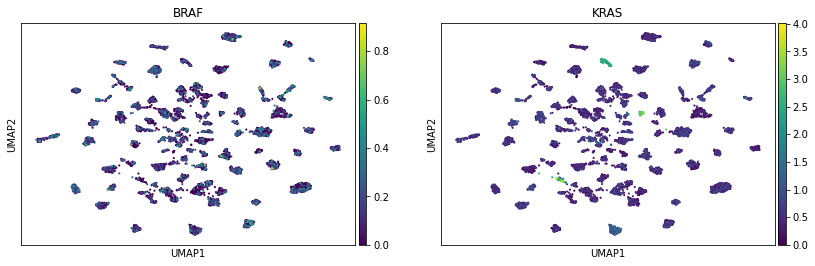

In [42]:
sc.pl.umap(adata, color=['BRAF', 'KRAS' ]) 

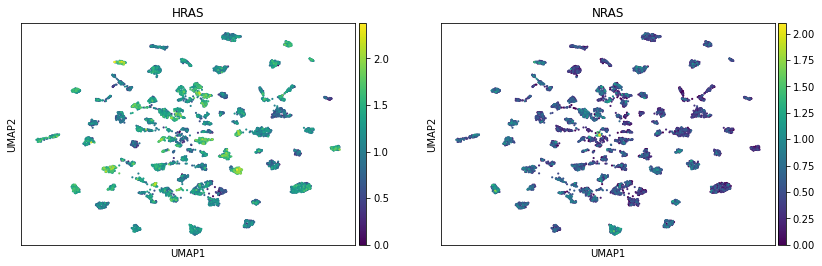

In [44]:
sc.pl.umap(adata, color=['HRAS', 'NRAS'  ])  

## Clustering the neighborhood graph

In [45]:
sc.tl.leiden(adata)

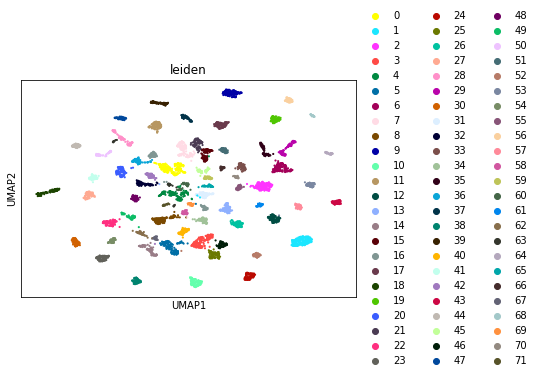

In [49]:
sc.pl.umap(adata, color=['leiden' ])

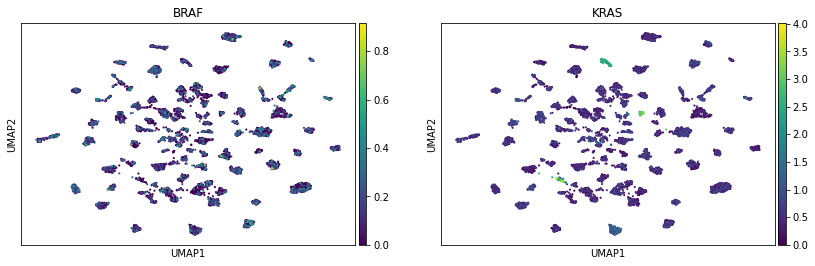

In [50]:
sc.pl.umap(adata, color=['BRAF', 'KRAS' ])

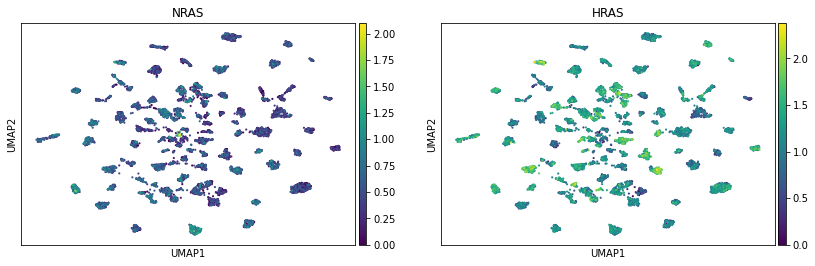

In [51]:
sc.pl.umap(adata, color=[ 'NRAS', 'HRAS' ])

## Cell line annotation

Using **classification.csv** as metadata.

In [52]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
test_celllist.sort()
print(test_celllist)

['22RV1_PROSTATE', '42MGBA_CENTRAL_NERVOUS_SYSTEM', '769P_KIDNEY', '786O_KIDNEY', '8505C_THYROID', 'A2780_OVARY', 'A375_SKIN', 'ACCMESO1_PLEURA', 'AGS_STOMACH', 'BEN_LUNG', 'CAL120_BREAST', 'CAL62_THYROID', 'CAOV3_OVARY', 'CJM_SKIN', 'COLO668_LUNG', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DMS273_LUNG', 'DV90_LUNG', 'EFM192A_BREAST', 'G401_SOFT_TISSUE', 'GCIY_STOMACH', 'GP2D_LARGE_INTESTINE', 'HCC1143_BREAST', 'HCC1195_LUNG', 'HCC1419_BREAST', 'HEC1B_ENDOMETRIUM', 'HEP3B217_LIVER', 'HS766T_PANCREAS', 'HS852T_SKIN', 'HUCCT1_BILIARY_TRACT', 'IGR1_SKIN', 'IGROV1_OVARY', 'ISTMES1_PLEURA', 'J82_URINARY_TRACT', 'JHH5_LIVER', 'JHOM1_OVARY', 'KNS42_CENTRAL_NERVOUS_SYSTEM', 'KNS60_CENTRAL_NERVOUS_SYSTEM', 'KNS81_CENTRAL_NERVOUS_SYSTEM', 'KYSE270_OESOPHAGUS', 'LI7_LIVER', 'LK2_LUNG', 'LMSU_STOMACH', 'LN229_CENTRAL_NERVOUS_SYSTEM', 'LNCAPCLONEFGC_PROSTATE', 'LOVO_LARGE_INTESTINE', 'LUDLU1_LUNG', 'MALME3M_SKIN', 'MDAMB435S_SKIN', 'MDAMB468_BREAST', 'MIAPACA2_PANCREAS', 'MSTO211H_PLEURA', 'NCIH1048_

In [53]:
meta = classification

In [54]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAGCAATT-1,UACC257_SKIN,1508,0.712618,15.495622,0.506611,13.548359,0.072938,3208,0.006780,UACC257_SKIN,NUGC3_STOMACH,4.414052,0.183071,normal,3.991730e-07,ACH-000579
AAACCTGAGATCTGAA-1,HEC1B_ENDOMETRIUM,1949,0.678595,9.745427,0.420509,7.417785,0.060467,4862,0.005620,HEC1B_ENDOMETRIUM,RCC10RGB_KIDNEY,7.822240,0.210704,normal,4.545183e-08,ACH-000941
AAACCTGCACACTGCG-1,LOVO_LARGE_INTESTINE,1145,0.195406,2.740381,0.015594,0.421547,0.116991,2550,0.060087,LOVO_LARGE_INTESTINE,HS766T_PANCREAS,3.687957,0.167387,empty_droplet,NaN,ACH-000950
AAACCTGCACCAGATT-1,COLO680N_OESOPHAGUS,1721,0.717149,21.908137,0.511051,17.376046,1.797817,4325,0.004348,COLO680N_OESOPHAGUS,A2780_OVARY,3.072946,0.196673,normal,5.658369e-09,ACH-000717
AAACCTGCAGCTCGAC-1,KYSE270_OESOPHAGUS,1966,0.851971,14.055579,0.617102,11.794789,0.073605,4925,0.001130,KYSE270_OESOPHAGUS,CJM_SKIN,2.719318,0.222283,normal,1.816224e-12,ACH-000873


In [55]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGAGCAATT-1,5984,47011.0,2072.0,4.407479,40
AAACCTGAGATCTGAA-1,6890,68559.0,5358.0,7.815166,58
AAACCTGCACACTGCG-1,5473,41919.0,1544.0,3.683294,13
AAACCTGCACCAGATT-1,6429,58468.0,1795.0,3.070055,15
AAACCTGCAGCTCGAC-1,7269,63829.0,1734.0,2.716634,44


In [56]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [57]:
f = lambda x: x.split('_', 1  ) [1]
adata.obs['Tissue type'] = adata.obs['Cell type'].apply( f )

... storing 'Cell type' as categorical
... storing 'Tissue type' as categorical


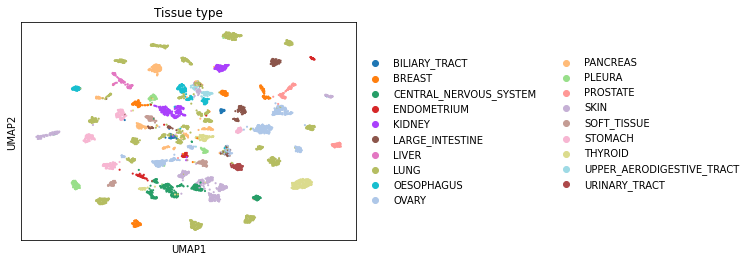

In [58]:
sc.pl.umap(adata, color='Tissue type')

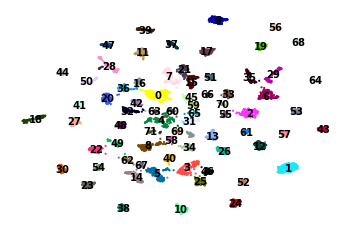

In [59]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [60]:
list(adata.obs['Cell type'].unique())

['UACC257_SKIN',
 'HEC1B_ENDOMETRIUM',
 'LOVO_LARGE_INTESTINE',
 'COLO680N_OESOPHAGUS',
 'KYSE270_OESOPHAGUS',
 'OSRC2_KIDNEY',
 'NCIH2444_LUNG',
 'HCC1419_BREAST',
 'MSTO211H_PLEURA',
 'HS766T_PANCREAS',
 'CAL62_THYROID',
 '8505C_THYROID',
 'G401_SOFT_TISSUE',
 'MIAPACA2_PANCREAS',
 'NCIH522_LUNG',
 'LN229_CENTRAL_NERVOUS_SYSTEM',
 'NCIH2347_LUNG',
 'LMSU_STOMACH',
 'NCIH1299_LUNG',
 'OAW42_OVARY',
 'SNU1105_CENTRAL_NERVOUS_SYSTEM',
 'KNS60_CENTRAL_NERVOUS_SYSTEM',
 'COLO668_LUNG',
 'SNB75_CENTRAL_NERVOUS_SYSTEM',
 '769P_KIDNEY',
 'NCIH841_LUNG',
 'SNU245_BILIARY_TRACT',
 'TE6_OESOPHAGUS',
 'KNS81_CENTRAL_NERVOUS_SYSTEM',
 'A375_SKIN',
 'SW579_THYROID',
 'J82_URINARY_TRACT',
 'IGROV1_OVARY',
 'CJM_SKIN',
 'NCIH1581_LUNG',
 '42MGBA_CENTRAL_NERVOUS_SYSTEM',
 'GCIY_STOMACH',
 'NUGC3_STOMACH',
 '22RV1_PROSTATE',
 'DMS273_LUNG',
 'TE11_OESOPHAGUS',
 'IGR1_SKIN',
 'NCIH2126_LUNG',
 'GP2D_LARGE_INTESTINE',
 'LI7_LIVER',
 'MDAMB468_BREAST',
 'MALME3M_SKIN',
 'NCIH838_LUNG',
 'ISTMES1_PLEURA',